# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuacjok
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | sambava
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | pitkyaranta
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | happy valley-goose bay
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | igarka
Processing Record 10 of Set 1 | qamdo
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | nyurba
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | zouerate
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | muzayri'
City not 

Processing Record 38 of Set 4 | el tigre
Processing Record 39 of Set 4 | swakopmund
Processing Record 40 of Set 4 | tromso
Processing Record 41 of Set 4 | rattvik
City not found. Skipping...
Processing Record 42 of Set 4 | primero de mayo
Processing Record 43 of Set 4 | ambovombe
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | saipan
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | musay'id
City not found. Skipping...
Processing Record 48 of Set 4 | puerto baquerizo moreno
Processing Record 49 of Set 4 | gobabis
Processing Record 0 of Set 5 | mil'kovo
Processing Record 1 of Set 5 | thunder bay
Processing Record 2 of Set 5 | port mathurin
Processing Record 3 of Set 5 | alenquer
Processing Record 4 of Set 5 | howrah
Processing Record 5 of Set 5 | palmas
Processing Record 6 of Set 5 | at taraf
Processing Record 7 of Set 5 | weno
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 |

Processing Record 33 of Set 8 | ahau
City not found. Skipping...
Processing Record 34 of Set 8 | zhengzhou
Processing Record 35 of Set 8 | faya-largeau
Processing Record 36 of Set 8 | nur-sultan
Processing Record 37 of Set 8 | st. john's
Processing Record 38 of Set 8 | natal
Processing Record 39 of Set 8 | nilsia
Processing Record 40 of Set 8 | lihue
Processing Record 41 of Set 8 | muli
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | santa terezinha
Processing Record 44 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 45 of Set 8 | chalons-en-champagne
Processing Record 46 of Set 8 | geraldton
Processing Record 47 of Set 8 | neiafu
Processing Record 48 of Set 8 | opochka
Processing Record 49 of Set 8 | cidade velha
Processing Record 0 of Set 9 | prachuap khiri khan
Processing Record 1 of Set 9 | arkalyk
Processing Record 2 of Set 9 | kogalym
Processing Record 3 of Set 9 | kapit
Processing Record 4 of Set 9 | ngozi
Processing Record 5 of Set 9 | pau

Processing Record 25 of Set 12 | san fernando de apure
Processing Record 26 of Set 12 | hailar
Processing Record 27 of Set 12 | ambodifotatra
Processing Record 28 of Set 12 | mandalgovi
Processing Record 29 of Set 12 | neubrandenburg
Processing Record 30 of Set 12 | cruzeiro do sul
Processing Record 31 of Set 12 | taoudenni
Processing Record 32 of Set 12 | knyaze-volkonskoye
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 12 | bodaybo
Processing Record 35 of Set 12 | flin flon
Processing Record 36 of Set 12 | petatlan
Processing Record 37 of Set 12 | manismata
Processing Record 38 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 39 of Set 12 | kisarazu
Processing Record 40 of Set 12 | kalevala
Processing Record 41 of Set 12 | bogale
Processing Record 42 of Set 12 | manadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [74]:
# Display sample data
print(city_data_df.head())

          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      kuacjok   8.3002   27.9903     74.07        87         100        3.33   
1     kirakira -10.4544  161.9205     85.35        69          83       10.04   
2      sambava -14.2667   50.1667     72.28        94          23        5.66   
3         tura  25.5198   90.2201     67.05        90           0        3.02   
4  pitkyaranta  61.5734   31.4792     35.51        80          96        6.35   

  Country        Date  
0      SS  1697671616  
1      SB  1697671519  
2      MG  1697671616  
3      IN  1697671616  
4      RU  1697671616  


In [75]:
# Export the City_Data into a csv
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

output_data_file = output_data_file = "C:/Users/DeMiko Birden/Downloads/python-api-challenge/Starter_Code/cities.csv"


city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()




City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

""
City_ID


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

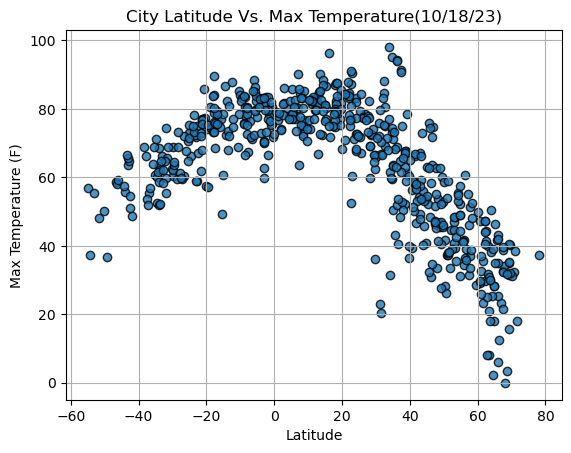

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

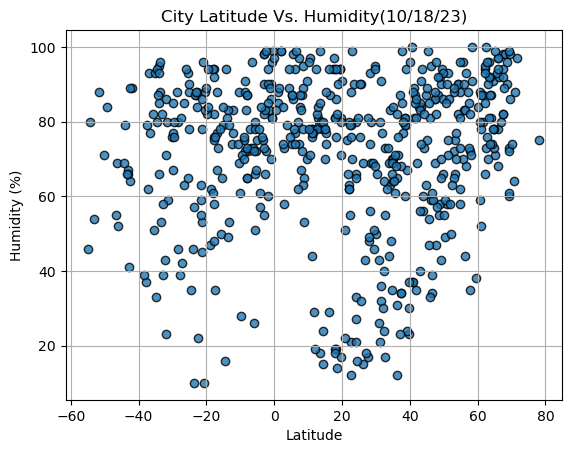

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

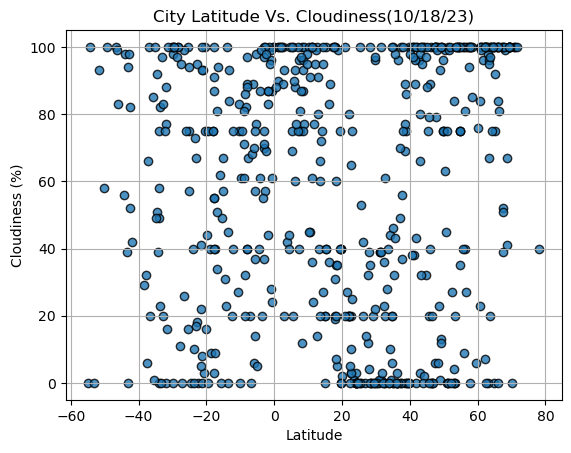

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

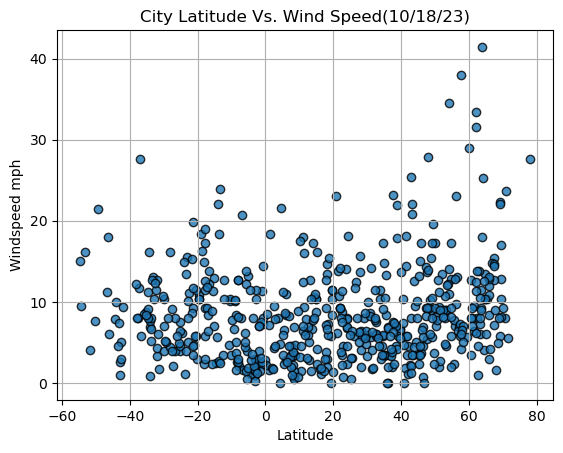

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots

city_data_df = pd.read_csv("output_data/cities.csv")


def create_linear_regression_plot(x, y, x_label, y_label):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)

    y_pred = model.predict(x)

    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, y_pred, color='red', label='Linear Regression')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Linear Regression: {y_label} vs. {x_label}')

    plt.legend()
    plt.show()



In [76]:
print(city_data_df.head())




          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      kuacjok   8.3002   27.9903     74.07        87         100        3.33   
1     kirakira -10.4544  161.9205     85.35        69          83       10.04   
2      sambava -14.2667   50.1667     72.28        94          23        5.66   
3         tura  25.5198   90.2201     67.05        90           0        3.02   
4  pitkyaranta  61.5734   31.4792     35.51        80          96        6.35   

  Country        Date  
0      SS  1697671616  
1      SB  1697671519  
2      MG  1697671616  
3      IN  1697671616  
4      RU  1697671616  


In [80]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuacjok,8.3002,27.9903,74.07,87,100,3.33,SS,1697671616
3,tura,25.5198,90.2201,67.05,90,0,3.02,IN,1697671616
4,pitkyaranta,61.5734,31.4792,35.51,80,96,6.35,RU,1697671616
5,ust-nera,64.5667,143.2000,2.21,91,100,4.00,RU,1697671616
6,happy valley-goose bay,53.3168,-60.3315,39.51,75,20,4.61,CA,1697671531


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample 
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kirakira,-10.4544,161.9205,85.35,69,83,10.04,SB,1697671519
2,sambava,-14.2667,50.1667,72.28,94,23,5.66,MG,1697671616
11,port elizabeth,-33.9180,25.5701,63.32,95,0,6.91,ZA,1697671617
12,waitangi,-43.9535,-176.5597,55.81,79,98,10.00,NZ,1697671617
14,ushuaia,-54.8000,-68.3000,56.86,46,0,15.01,AR,1697671617


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.835104070443248


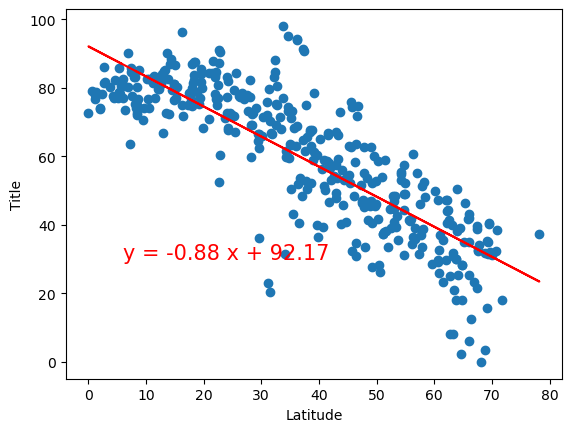

In [83]:
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7407884334281292


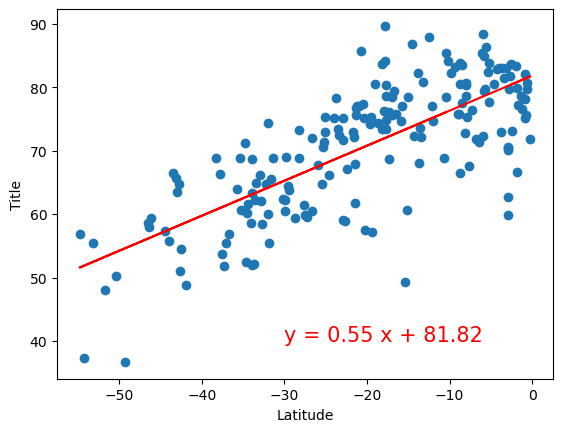

In [84]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.83 on Northern Hemisphere.

There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.74 on Southern Hemisphere.



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12863149151502987


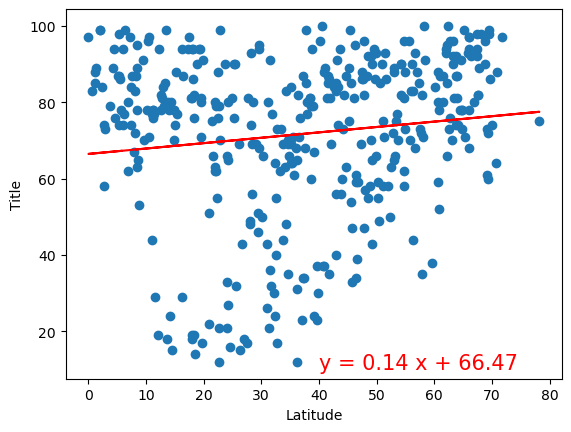

In [85]:
# Northern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.16087569225180595


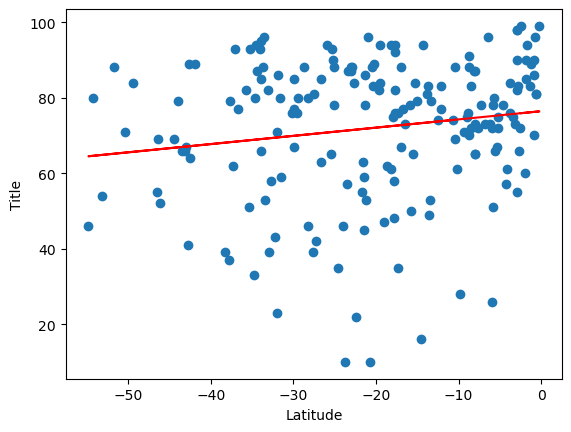

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There is a relatively strong positive correlation between humidity and latitude with a correlation coefficient of 0.12 on Northern Hemisphere.

There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.16 on Southern Hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.14058822634878546


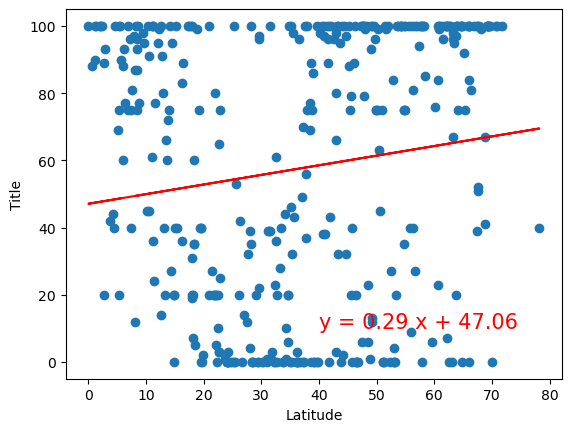

In [87]:
# Northern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.047227146929285535


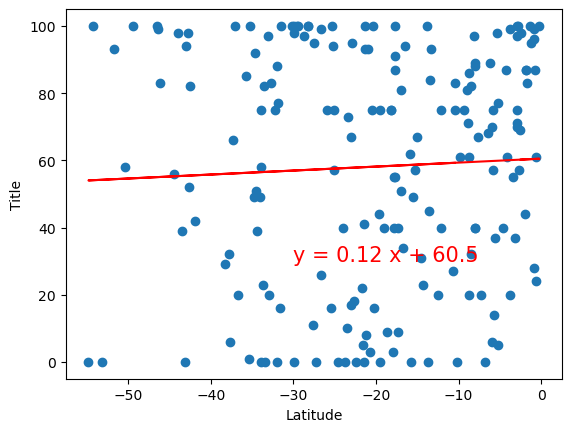

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:There is a strong positive correlation between cloudiness and latitude with a correlation coefficient of 0.14 on Northern Hemisphere.
 There is a  positive correlation between cloudiness and latitude with a correlation coefficient of 0.07 on Southern Hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.29250964993210976


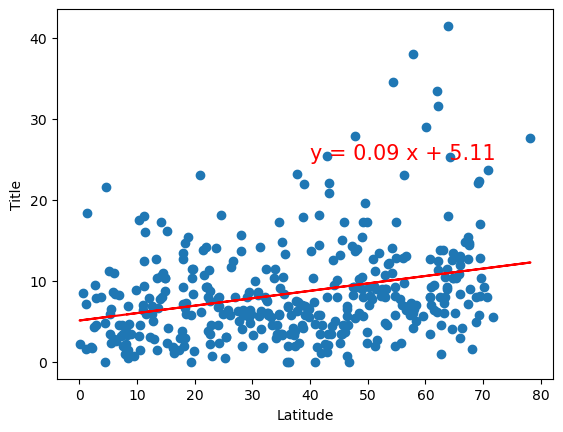

In [90]:
# Northern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.21268848823788533


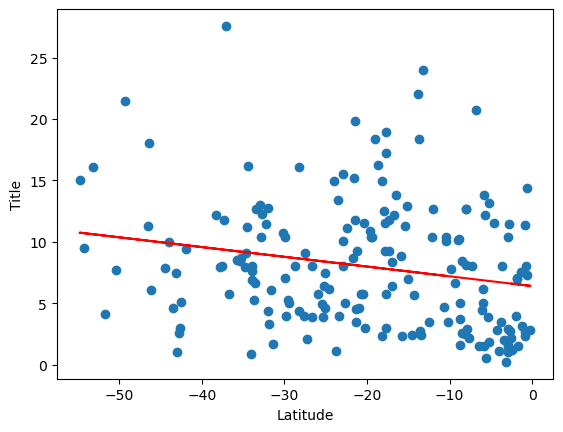

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of 0.21507837130179397 on Northern Hemisphere

There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.21 on Southern Hemisphere.